In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import chainer
from dataset import SquaresDataset
import matplotlib.pyplot as plt
import numpy as np
from functions import *
from tests import *
from chainer import cuda 
import cupy
from chainer.optimizers import MomentumSGD,Adam 

In [3]:
db = SquaresDataset()
# Network initialization
from network import VGGNet
net = VGGNet()
net.to_gpu(0)

# Optimizer
# optimizer =MomentumSGD(lr= 0.05)
optimizer = Adam(alpha= 0.0001)
optimizer.setup(net)

# Move network to gpu

  0%|          | 0/1000 [00:00<?, ?it/s]

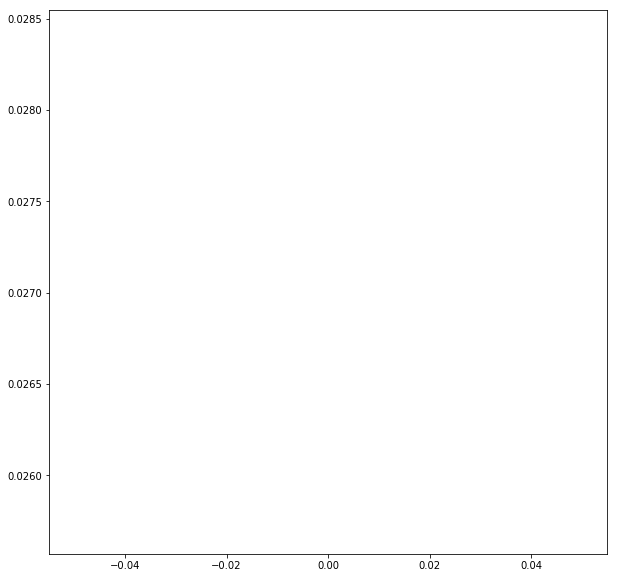

  1%|          | 10/1000 [00:05<07:52,  2.10it/s]

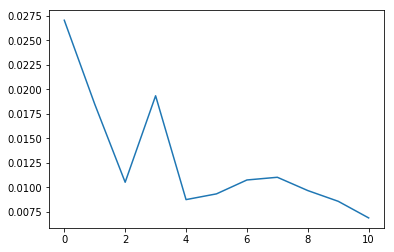

  2%|▏         | 20/1000 [00:09<07:13,  2.26it/s]

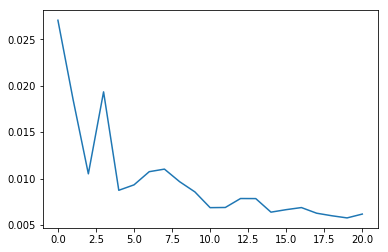

  3%|▎         | 30/1000 [00:14<07:03,  2.29it/s]

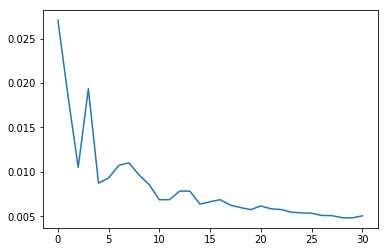

  4%|▍         | 40/1000 [00:18<07:02,  2.27it/s]

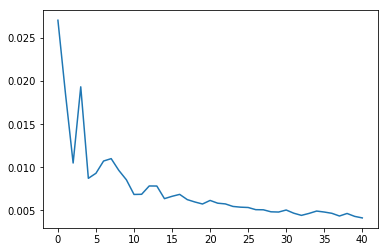

  5%|▌         | 50/1000 [00:23<06:56,  2.28it/s]

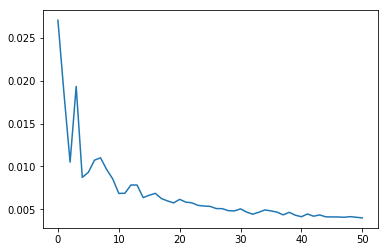

  6%|▌         | 60/1000 [00:27<06:55,  2.26it/s]

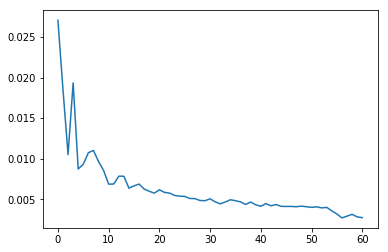

  7%|▋         | 70/1000 [00:32<06:49,  2.27it/s]

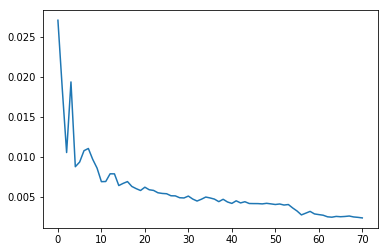

  8%|▊         | 80/1000 [00:36<06:46,  2.27it/s]

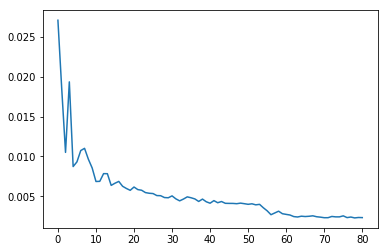

  9%|▉         | 90/1000 [00:41<06:40,  2.27it/s]

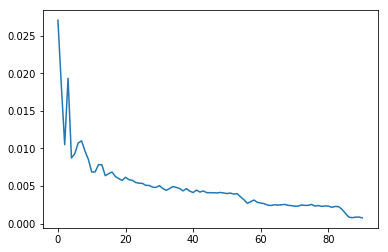

 10%|█         | 100/1000 [00:45<06:37,  2.27it/s]

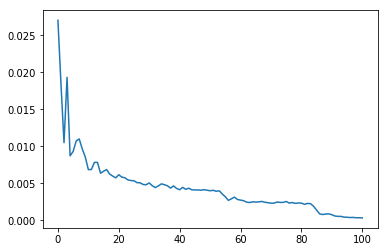

 11%|█         | 110/1000 [00:50<06:30,  2.28it/s]

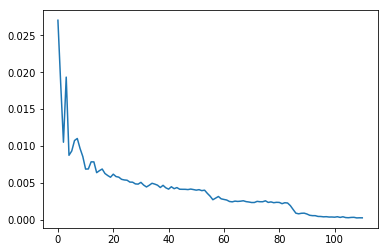

 12%|█▏        | 120/1000 [00:54<06:28,  2.26it/s]

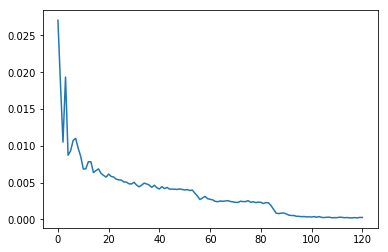

 13%|█▎        | 130/1000 [00:59<06:24,  2.26it/s]

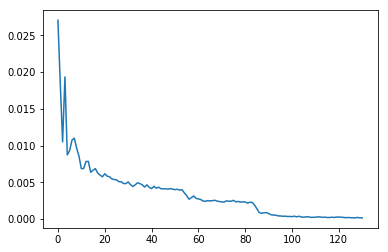

 14%|█▍        | 140/1000 [01:03<06:20,  2.26it/s]

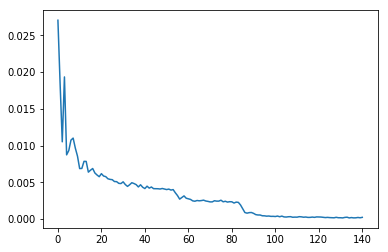

 15%|█▌        | 150/1000 [01:08<06:16,  2.26it/s]

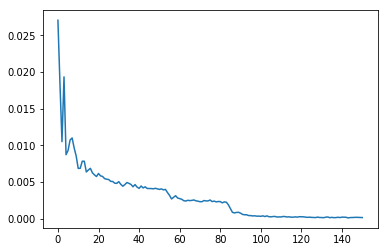

 16%|█▌        | 160/1000 [01:12<06:08,  2.28it/s]

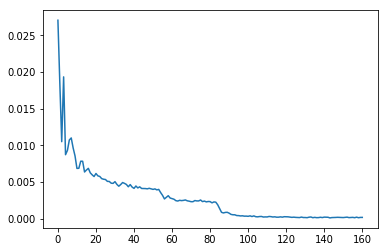

 17%|█▋        | 170/1000 [01:17<06:03,  2.28it/s]

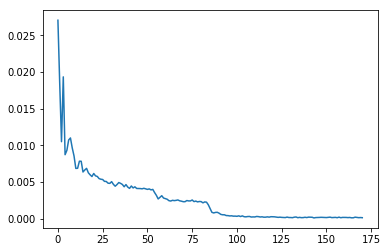

 18%|█▊        | 180/1000 [01:21<06:04,  2.25it/s]

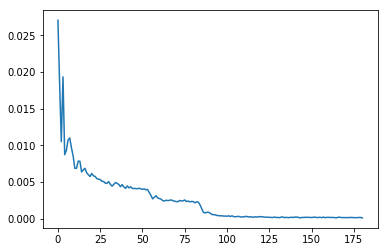

 19%|█▉        | 190/1000 [01:26<05:56,  2.27it/s]

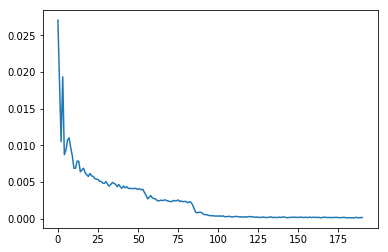

 20%|██        | 200/1000 [01:30<05:54,  2.26it/s]

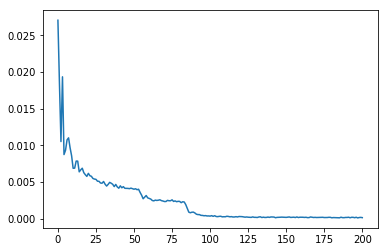

 21%|██        | 210/1000 [01:35<05:47,  2.28it/s]

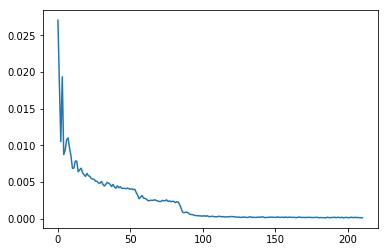

 22%|██▏       | 220/1000 [01:39<05:44,  2.27it/s]

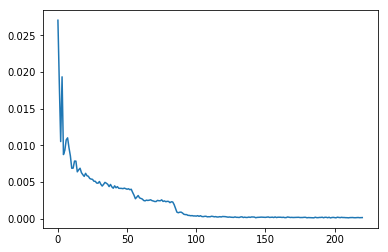

 23%|██▎       | 230/1000 [01:44<05:44,  2.23it/s]

KeyboardInterrupt: 

In [4]:
from tqdm import tqdm
losses = []

plt.figure(figsize=(10,10))


# Training for loop
for i in tqdm(range(1000)):
    imgs, labels = db.generate_batch(n=10, h=50, w=50, img_h=240, img_w=240)
    imgs_down, labels_down = downsample(imgs, labels)
    
    net.to_gpu(0)

    imgs_gpu = chainer.Variable(cuda.to_gpu(imgs)) #gpu
    
    gt_class, gt_loc = encode_y(imgs_down, labels_down) #cpu
    
    gt_class.to_gpu(0)
    gt_loc.to_gpu(0)

    # Forward pass: SLOW!!!
    pred_class, pred_loc = net(imgs_gpu) #net(imgs) #gpu
    
    
   # Loss calculation
#     class_loss = classification_loss(pred_class, gt_class)

#     class_loss = regression_loss(pred_loc, gt_loc, gt_class)
    
    
    net_loss = loss(pred_class, pred_loc, gt_class, gt_loc, lambd=1.0)
    #print(net_loss.debug_print())
    #net_loss.to_gpu(0)
    
    # Update network
    net.zerograds()
    net_loss.backward()
    optimizer.update()
    
    # Print loss
    #show_image(pred_class.data[0,0,:,:], 'prediction output vgg')
    #
    #show_image(gt_class.data[0,0,:,:], 'class output vgg')
    losses.append(net_loss.data.get())
    
    #print(net_loss.data)
    if i % 10 == 0:
        plt.plot(range(len(losses)), losses)
        plt.show()
    
# Final loss plot


## Testing 

In [5]:
# db = SquaresDataset()
# imgs, labels = db.generate_batch(n=10, h=50, w=50, img_h=240, img_w=240)
# imgs_down, labels_down = downsample(imgs, labels)
gt_loc.to_cpu()
pred_loc.to_cpu()

pred_loc[0,:,40,45]   


(40-(12.5*0.94)),(40-(12.5*0.69)),45-(12.5*0.07),45-(12.5*0.39)   

for i in range(5):
    for c in range(4):
        plt.title("gt_loc_image_%d_%d"%(i, c))
        plt.imshow(gt_loc[i,c,:,:].data,)
        plt.colorbar()
        plt.show()
        
        plt.title("gt_loc_hist_%d_%d"%(i, c))
        plt.hist(gt_loc[i,c,:,:].data.ravel()) 
        plt.show()
        
        plt.title("pred_loc_image_%d_%d"%(i, c))
        plt.imshow(pred_loc[i,c,:,:].data)
        plt.colorbar()
        plt.show()
        
        plt.title("pred_loc_hist_%d_%d"%(i, c))
        plt.hist(pred_loc[i,c,:,:].data.ravel())
        plt.show()
    
        

variable([ 0.53274715,  0.50126028,  0.49057242,  0.52152222])

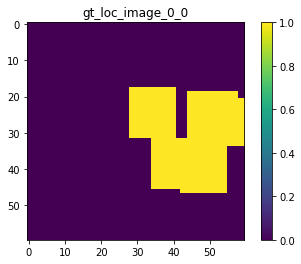

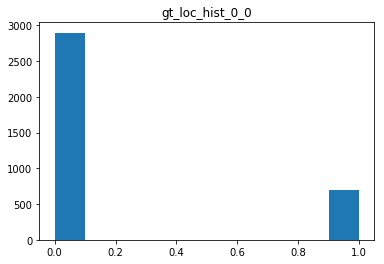

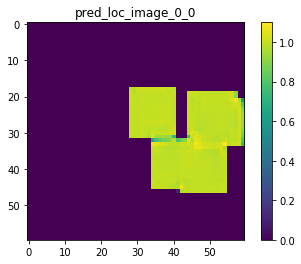

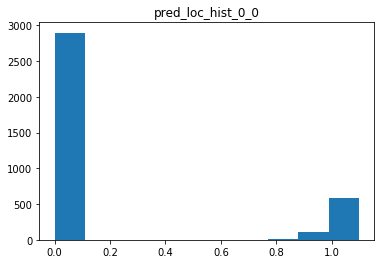

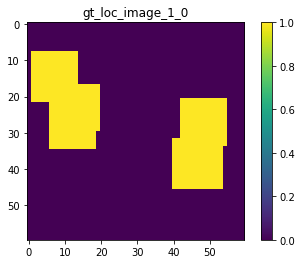

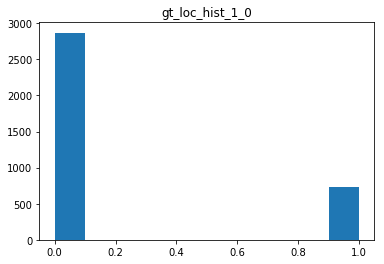

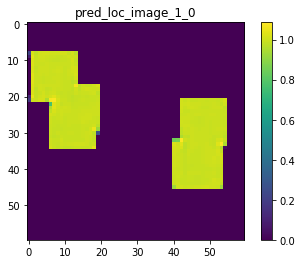

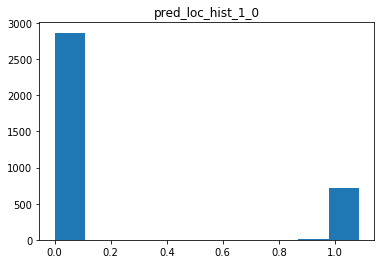

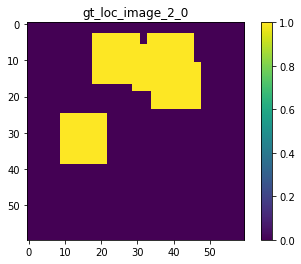

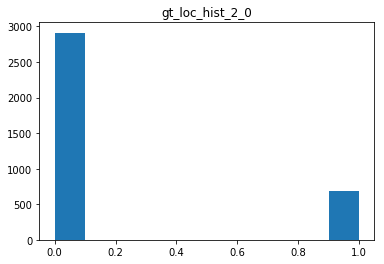

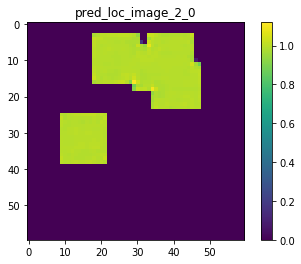

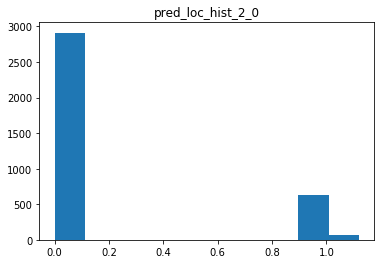

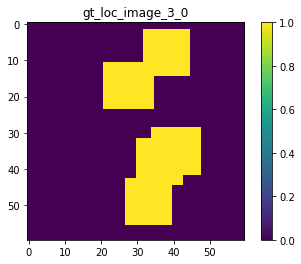

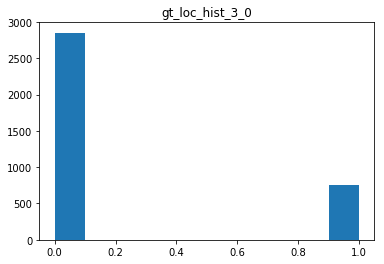

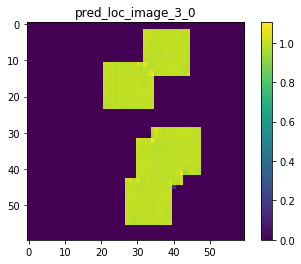

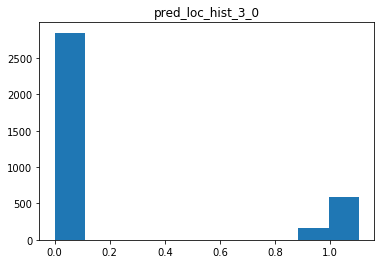

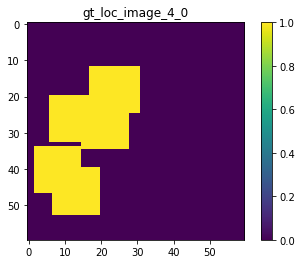

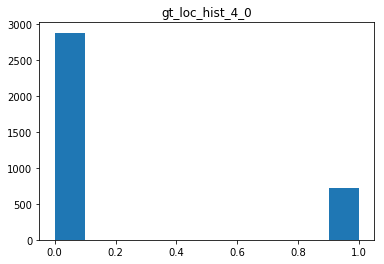

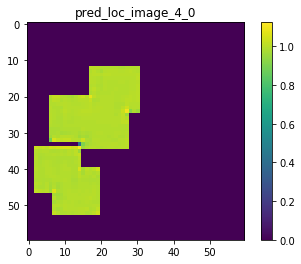

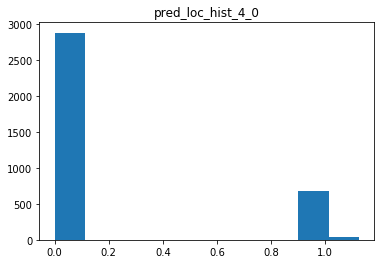

In [8]:
gt_class.to_cpu()
pred_class.to_cpu()

for i in range(5):
    for c in range(1):
        plt.title("gt_loc_image_%d_%d"%(i, c))
        plt.imshow(gt_class[i,c,:,:].data)
        plt.colorbar()
        plt.show()
        
        plt.title("gt_loc_hist_%d_%d"%(i, c))
        plt.hist(gt_class[i,c,:,:].data.ravel()) 
        plt.show()
        
        plt.title("pred_loc_image_%d_%d"%(i, c))
        plt.imshow(pred_class[i,c,:,:].data)
        plt.colorbar()
        plt.show()
        
        plt.title("pred_loc_hist_%d_%d"%(i, c))
        plt.hist(pred_class[i,c,:,:].data.ravel())
        plt.show()
    

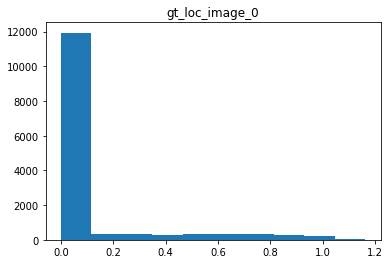

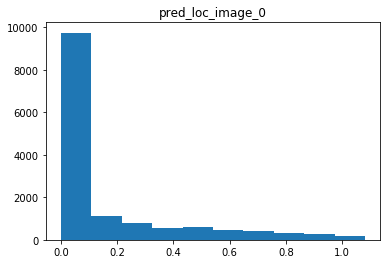

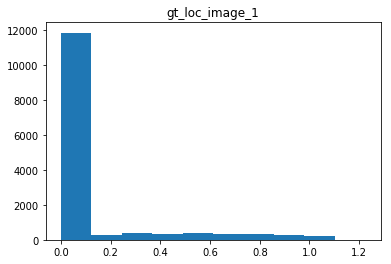

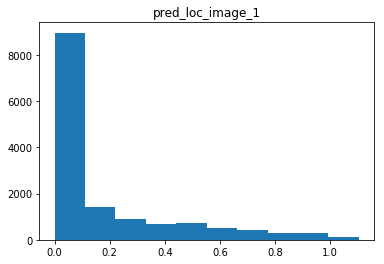

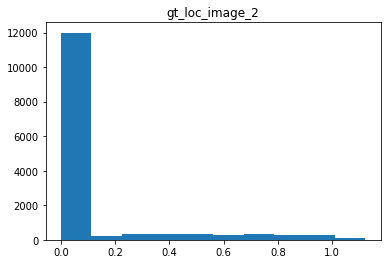

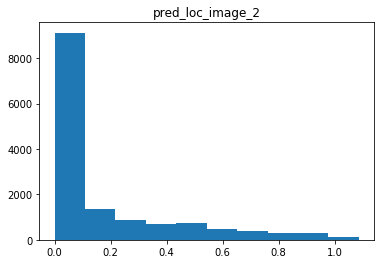

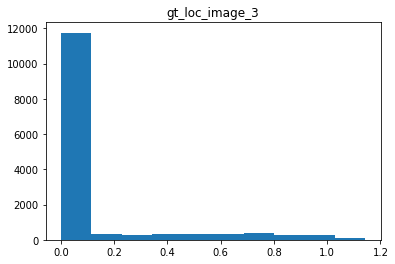

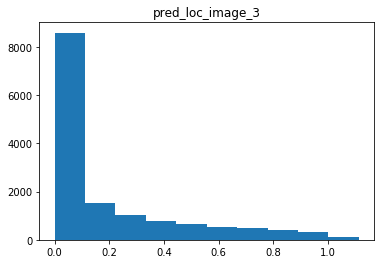

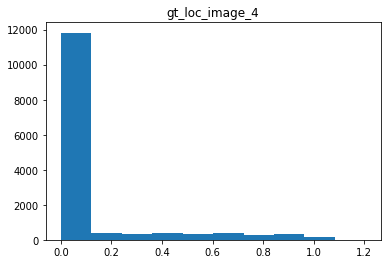

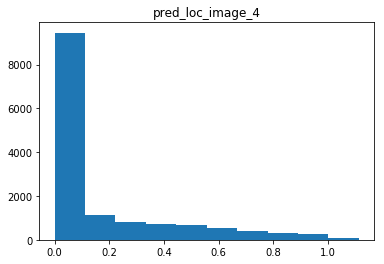

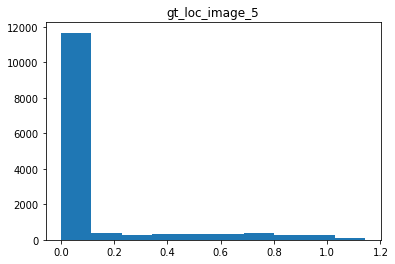

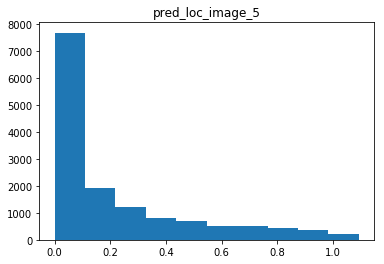

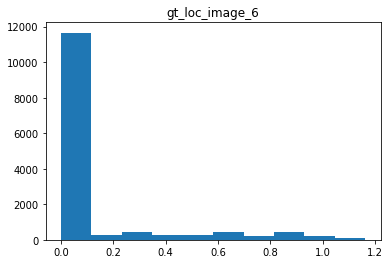

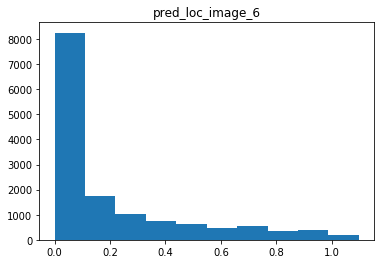

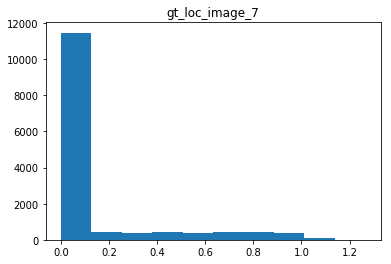

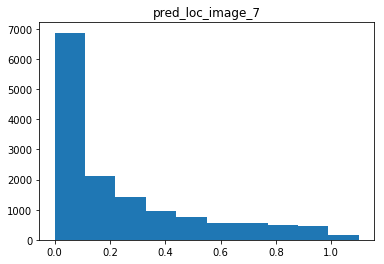

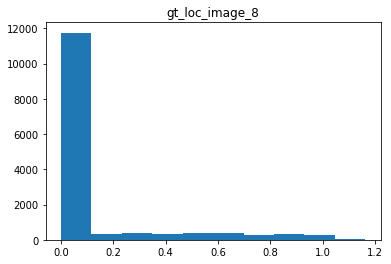

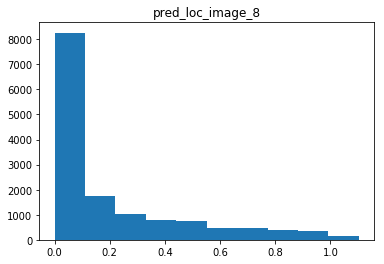

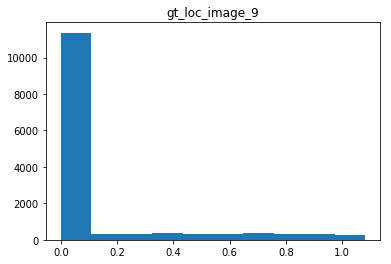

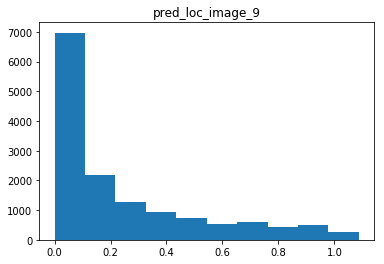

In [9]:
for b in range(gt_loc.shape[0]):
    plt.title('gt_loc_image_%d'%b)
    plt.hist(gt_loc[b,:,:,:].data.ravel())
    plt.show()

    plt.title('pred_loc_image_%d'%b)
    plt.hist(pred_loc[b,:,:,:].data.ravel())
    plt.show()

## Drawing boxes

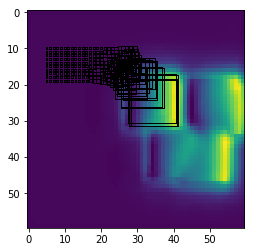

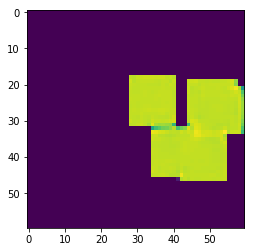

In [10]:
import matplotlib as mt 
single_pred = pred_loc[0,:,:,:]
single_image = gt_loc[1,0,:,:]
single_image  = single_image.data
pix_loc = [10,10]

plt.figure()
ax = plt.axes()
plt.imshow(pred_loc[0,0,:,:].data)

for pix_x in range(5,30):
    for pix_y in range(10,20): 
        
        
        single_box = pred_loc[0,:,pix_y,pix_x]
        box_coordinates = [pix_x-12.5*single_box[0],
                           pix_y-12.5*single_box[1], 
                           pix_x+12.5*single_box[2], 
                            pix_y+12.5*single_box[3]]
        box_coordinates = [i.data for i in box_coordinates]

        for i in range(4):
            rect = mt.patches.Rectangle((box_coordinates[0], box_coordinates[1]),
                                        box_coordinates[2]-box_coordinates[0],
                                        box_coordinates[3]-box_coordinates[1],fill=False)
            ax.add_patch(rect)

#             plt.colorbar()
#             plt.show()
#           plt.imshow(pred_loc[0,i,:,:].data)
#             plt.colorbar()
#             plt.show()

plt.show()

plt.imshow(pred_class[0,0,:,:].data)
plt.show()

In [11]:
variable([ 0.02219371  0.4949863   1.09543598  0.38524154])

SyntaxError: invalid syntax (<ipython-input-11-f55818cb8ccc>, line 1)

## Test set 

In [ ]:
imgs2, labels2 = db.generate_batch(n=20, h=30, w=30, img_h=240, img_w=240)
imgs_down2, labels_down2 = downsample(imgs2, labels2)

imgs_gpu2 = chainer.Variable(cuda.to_gpu(imgs2)) #gpu  

gt_class2, gt_loc2 = encode_y(imgs_down2, labels_down2) #cpu

gt_class2.to_gpu(0)
gt_loc2.to_gpu(0)

pred_class2, pred_loc2 = net(imgs_gpu2) #net(imgs) #gpu
    

In [ ]:
gt_loc2.to_cpu()
pred_loc2.to_cpu()

In [ ]:
for i in range(5):
    for c in range(4):
        plt.title("gt_loc_image_%d_%d"%(i, c))
        plt.imshow(gt_loc2[i,c,:,:].data,)
        plt.colorbar()
        plt.show()
        
        plt.title("gt_loc_hist_%d_%d"%(i, c))
        plt.hist(gt_loc2[i,c,:,:].data.ravel()) 
        plt.show()
        
        plt.title("pred_loc_image_%d_%d"%(i, c))
        plt.imshow(pred_loc2[i,c,:,:].data)
        plt.colorbar()
        plt.show()
        
        plt.title("pred_loc_hist_%d_%d"%(i, c))
        plt.hist(pred_loc2[i,c,:,:].data.ravel())
        plt.show()
    

## Combine all channels

In [ ]:
one_image  = imgs_down2[0,:,:,:]
pred_image = pred_loc2[0,:,:,:]
pred_image_sum = np.sum(pred_image.data, axis=0)

one_image= np.mean(one_image, axis=0)



In [ ]:
plt.figure()
plt.imshow(pred_image_sum)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(one_image)
plt.colorbar()
plt.show()


In [ ]:
x,y = np.mgrid[0:60, 0:60]
x.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, pred_image_sum, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:

pred_image_sum.shape
x.shape

In [ ]:
#!git commit -am "error code"

In [ ]:
#!git status

In [ ]:
#%env https_proxy http://proxy.ncbs.res.in:3128

In [ ]:
#!git push

In [ ]:
!git commit -am "generating lots of boxes from offsets. seems to be regressing."

In [ ]:
%env http_proxy http://proxy.ncbs.res.in:3128
%env https_proxy http://proxy.ncbs.res.in:3128

In [ ]:
!git push